# Laboratorio 04: Interpolación.

---
### Profesor: Daniel Ruiz Mejía
### Nombre: Candy Valentina López Villanueva
*Métodos computacionales 2025-I*

---

# 1.

Un automóvil que viaja a lo largo de una carretera recta es cronometrado en varios puntos. Los datos de las observaciones se dan en la siguiente tabla, donde el tiempo está en segundos, la distancia en metros y la velocidad en metros por segundo.

```
tiempos = np.array([0, 3, 5, 8, 13]) # segundos
distancias = np.array([0, 225, 383, 623, 993]) # metros
velocidades = np.array([75, 77, 80, 74, 72]) # metros/segundo
```

- Usar un polinomio de Hermite y de Splines Cúbicos para predecir la posición del automóvil y su velocidad cuando $t=10$ s.
- ¿Cuál es la velocidad máxima predicha para el automóvil en cada caso?

=== Resultados en t = 10 s ===
[Hermite]     Posición: 771.96 m, Velocidad: 74.64 m/s
[Spline Cúb.] Posición: 774.86 m, Velocidad: 74.16 m/s

=== Velocidad máxima predicha ===
[Hermite]     Velocidad máxima: 82.00 m/s
[Spline Cúb.] Velocidad máxima: 80.68 m/s


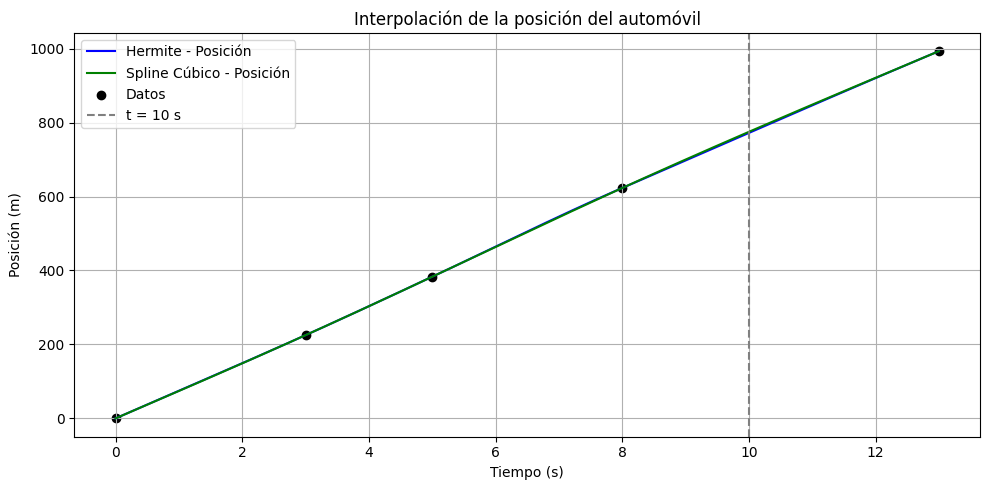

In [ ]:
#Aquí va su código
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicHermiteSpline, CubicSpline

# Datos
tiempos = np.array([0, 3, 5, 8, 13])  # segundos
distancias = np.array([0, 225, 383, 623, 993])  # metros
velocidades = np.array([75, 77, 80, 74, 72])  # m/s

# Hermite
hermite = CubicHermiteSpline(tiempos, distancias, velocidades)
pos_hermite_t10 = hermite(10)
vel_hermite_t10 = hermite.derivative()(10)

# Spline Cúbico
spline = CubicSpline(tiempos, distancias, bc_type='natural')
pos_spline_t10 = spline(10)
vel_spline_t10 = spline.derivative()(10)

# Evaluamos las velocidades en una malla fina para buscar el máximo
t_fino = np.linspace(tiempos[0], tiempos[-1], 1000)
vel_hermite_todos = hermite.derivative()(t_fino)
vel_spline_todos = spline.derivative()(t_fino)

vel_max_hermite = np.max(vel_hermite_todos)
vel_max_spline = np.max(vel_spline_todos)

# Resultados
print("=== Resultados en t = 10 s ===")
print(f"[Hermite]     Posición: {pos_hermite_t10:.2f} m, Velocidad: {vel_hermite_t10:.2f} m/s")
print(f"[Spline Cúb.] Posición: {pos_spline_t10:.2f} m, Velocidad: {vel_spline_t10:.2f} m/s")

print("\n=== Velocidad máxima predicha ===")
print(f"[Hermite]     Velocidad máxima: {vel_max_hermite:.2f} m/s")
print(f"[Spline Cúb.] Velocidad máxima: {vel_max_spline:.2f} m/s")

# Gráfica opcional
plt.figure(figsize=(10, 5))
plt.plot(t_fino, hermite(t_fino), label="Hermite - Posición", color='blue')
plt.plot(t_fino, spline(t_fino), label="Spline Cúbico - Posición", color='green')
plt.scatter(tiempos, distancias, color='black', label="Datos")
plt.axvline(10, color='gray', linestyle='--', label="t = 10 s")
plt.title("Interpolación de la posición del automóvil")
plt.xlabel("Tiempo (s)")
plt.ylabel("Posición (m)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

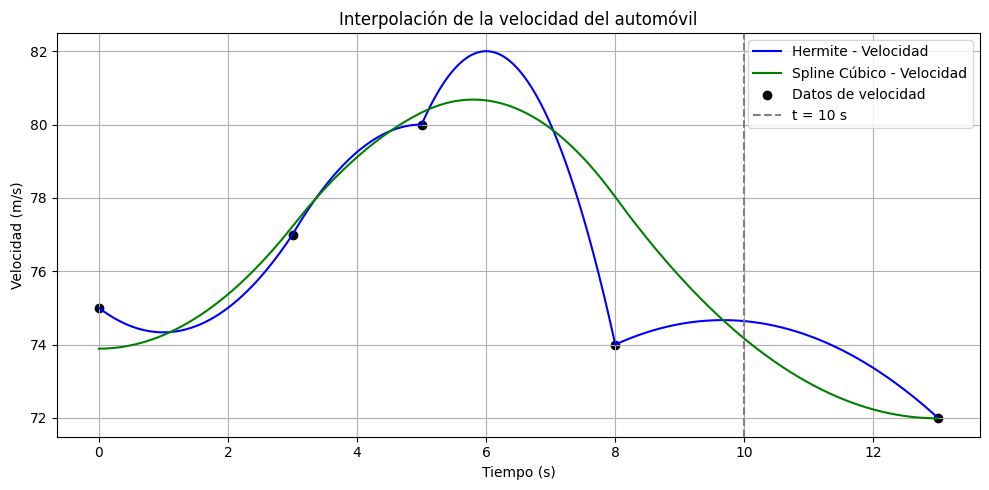

In [ ]:
# Gráfica de la velocidad predicha por cada método
plt.figure(figsize=(10, 5))
plt.plot(t_fino, vel_hermite_todos, label="Hermite - Velocidad", color='blue')
plt.plot(t_fino, vel_spline_todos, label="Spline Cúbico - Velocidad", color='green')
plt.scatter(tiempos, velocidades, color='black', label="Datos de velocidad")
plt.axvline(10, color='gray', linestyle='--', label="t = 10 s")
plt.title("Interpolación de la velocidad del automóvil")
plt.xlabel("Tiempo (s)")
plt.ylabel("Velocidad (m/s)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 2.
Los valores de la aceleración gravitacional $g$ dependen de la altitud $y$ según se muestra en la tabla. Utilice el método de diferencias divididas de Newton para estimar el valor de la aceleración gravitacional a las altitudes de 5,000 m, 42,000 m y 90,000 m. Grafique la distribución de la función de interpolación obtenida junto con los datos dados.

```
y = [0, 20000, 40000, 60000, 80000]  # en metros
g = [9.8100, 9.7487, 9.6879, 9.6278, 9.5682]  # en m/s²
```

g(5000 m) ≈ 9.7947 m/s²
g(42000 m) ≈ 9.6819 m/s²
g(90000 m) ≈ 9.5384 m/s²


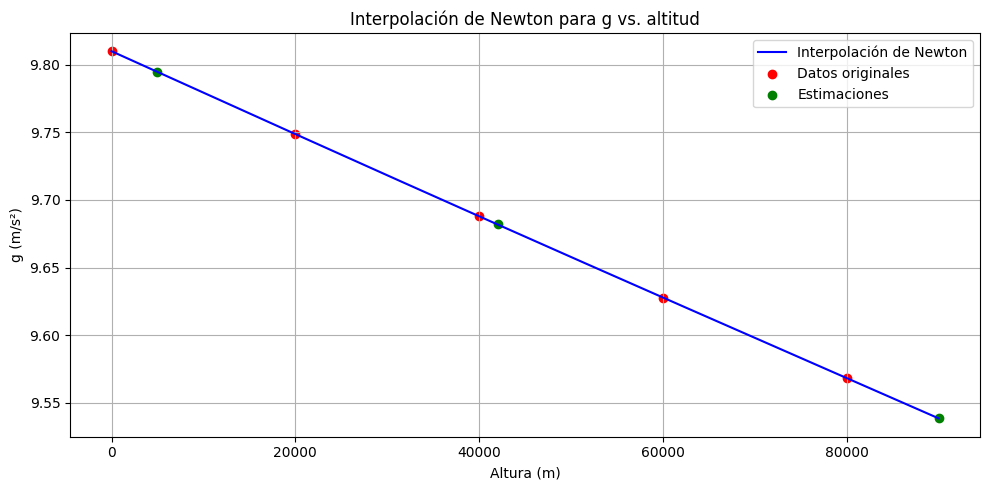

In [ ]:
#Aquí va su código
import numpy as np
import matplotlib.pyplot as plt

# Datos
y = np.array([0, 20000, 40000, 60000, 80000], dtype=float)
g = np.array([9.8100, 9.7487, 9.6879, 9.6278, 9.5682], dtype=float)

# Función para calcular diferencias divididas
def diferencias_divididas(x, y):
    n = len(x)
    coef = np.copy(y)
    for j in range(1, n):
        coef[j:] = (coef[j:] - coef[j-1:-1]) / (x[j:] - x[:n-j])
    return coef

# Función para evaluar el polinomio de Newton
def evaluar_newton(x_data, coef, x):
    n = len(coef)
    p = coef[-1]
    for k in range(n - 2, -1, -1):
        p = p * (x - x_data[k]) + coef[k]
    return p

# Calculamos coeficientes del polinomio de Newton
coef = diferencias_divididas(y, g)

# Evaluamos el polinomio en los valores deseados
alturas_objetivo = [5000, 42000, 90000]
estimaciones = [evaluar_newton(y, coef, val) for val in alturas_objetivo]

# Mostramos resultados
for altura, valor in zip(alturas_objetivo, estimaciones):
    print(f"g({altura} m) ≈ {valor:.4f} m/s²")

# Graficamos la interpolación y los datos originales
y_fino = np.linspace(0, 90000, 500)
g_interp = [evaluar_newton(y, coef, yi) for yi in y_fino]

plt.figure(figsize=(10, 5))
plt.plot(y_fino, g_interp, label="Interpolación de Newton", color='blue')
plt.scatter(y, g, color='red', label="Datos originales")
plt.scatter(alturas_objetivo, estimaciones, color='green', label="Estimaciones")
plt.xlabel("Altura (m)")
plt.ylabel("g (m/s²)")
plt.title("Interpolación de Newton para g vs. altitud")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# 3.
La densidad del aire $\rho$ depende de la temperatura $T$ como se muestra en la tabla. Utilice el método de diferencias divididas de Newton para estimar los valores de la densidad del aire a 250 K, 800 K y 3,000 K. Luego, determine la densidad del aire a temperaturas desde 100 K hasta 2,500 K en intervalos de 10 K. Grafique la distribución de la densidad del aire calculada en función de la temperatura.

```
T = np.array([100, 200, 300, 500, 700, 1000, 1500, 2000, 2500]) # en K
rho = np.array([3.6010, 1.7684, 1.1774, 0.7048, 0.5030, 0.3524, 0.2355, 0.1762, 0.1394]) # en kg/m^3
```



ρ(250 K) ≈ 1.3975 kg/m³
ρ(800 K) ≈ 0.4964 kg/m³
ρ(3000 K) ≈ 1561.1659 kg/m³


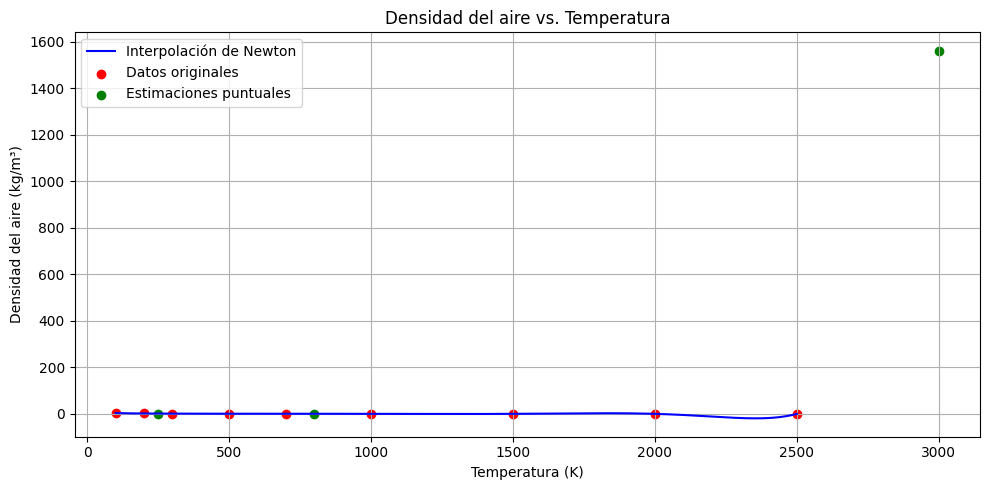

In [ ]:
#Aquí va su código
import numpy as np
import matplotlib.pyplot as plt

# Datos de entrada
T = np.array([100, 200, 300, 500, 700, 1000, 1500, 2000, 2500], dtype=float)  # Temperatura en K
rho = np.array([3.6010, 1.7684, 1.1774, 0.7048, 0.5030, 0.3524, 0.2355, 0.1762, 0.1394], dtype=float)  # Densidad en kg/m³

# Función para diferencias divididas
def diferencias_divididas(x, y):
    n = len(x)
    coef = np.copy(y)
    for j in range(1, n):
        coef[j:] = (coef[j:] - coef[j-1:-1]) / (x[j:] - x[:n-j])
    return coef

# Evaluar el polinomio de Newton
def evaluar_newton(x_data, coef, x):
    n = len(coef)
    p = coef[-1]
    for k in range(n - 2, -1, -1):
        p = p * (x - x_data[k]) + coef[k]
    return p

# Coeficientes de diferencias divididas
coef = diferencias_divididas(T, rho)

# Parte 1: Estimación en puntos dados
T_estimar = [250, 800, 3000]
rho_estimada = [evaluar_newton(T, coef, temp) for temp in T_estimar]

for temp, dens in zip(T_estimar, rho_estimada):
    print(f"ρ({temp} K) ≈ {dens:.4f} kg/m³")

# Parte 2: Evaluación en rango completo y graficar
T_rango = np.arange(100, 2501, 10)
rho_rango = [evaluar_newton(T, coef, temp) for temp in T_rango]

# Graficar
plt.figure(figsize=(10, 5))
plt.plot(T_rango, rho_rango, label="Interpolación de Newton", color='blue')
plt.scatter(T, rho, color='red', label="Datos originales")
plt.scatter(T_estimar, rho_estimada, color='green', label="Estimaciones puntuales")
plt.title("Densidad del aire vs. Temperatura")
plt.xlabel("Temperatura (K)")
plt.ylabel("Densidad del aire (kg/m³)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 4.
Uno de los dispositivos más precisos para medir temperatura es el termómetro de resistencia de platino, también conocido como RTD. En este dispositivo, un alambre delgado y largo de platino se enrolla alrededor de un carrete y se encapsula en una cubierta de acero inoxidable. La resistencia del alambre cambia de manera muy lineal con la temperatura. Una longitud típica de alambre tiene una resistencia de aproximadamente 100 $\Omega$ a $0^{\circ}$ C y cambia alrededor de 0.39 $\Omega/^{\circ}$ C. Por lo tanto, para medir temperaturas con precisión, es necesario poder medir cambios en la resistencia con alta resolución. Tradicionalmente, se ha utilizado el circuito de puente desequilibrado para esto, como se ilustra en la figura, el cual proporciona un voltaje de salida pequeño que es proporcional (aunque no linealmente) a la resistencia del sensor.

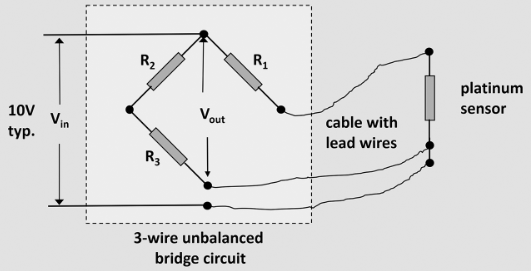




A continuación se presentan mediciones tomadas de dicho circuito, con $R_1 = R_2 = 5$ $k\Omega$ y $R_3 = 120$ $\Omega$:

```
resistencia = np.array([100, 115, 130, 145, 160, 175])  # Resistencia del sensor (Ohms)
voltaje = np.array([0.45244, 0.10592, -0.19918, -0.46988, -0.71167, -0.92896])  # Salida del puente (V)
```

Un termómetro de resistencia de platino estándar de 100 $\Omega$ tiene una resistencia de 139.27 $\Omega$ a $100^\circ$ C. Utilice el método de interpolación que desee para estimar el voltaje de salida del puente en estas condiciones. Si la salida del puente se mide en 0 voltios, estime la resistencia medida. ¿Qué conclusión puede obtener?

Voltaje estimado para R = 139.27 Ohm: -0.37015 V
Resistencia estimada para Vout = 0 V: 120.00 Ohm


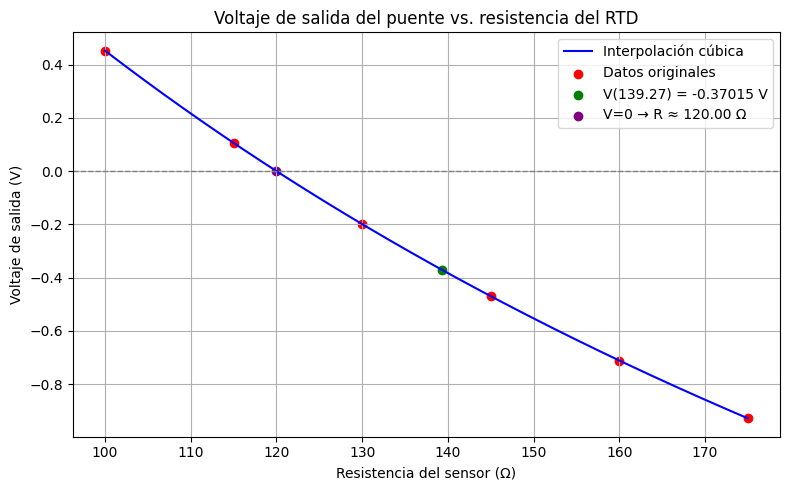

In [ ]:
#Aquí va su código
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

# Datos
resistencia = np.array([100, 115, 130, 145, 160, 175])  # Ohm
voltaje = np.array([0.45244, 0.10592, -0.19918, -0.46988, -0.71167, -0.92896])  # Volt

# Interpolador cúbico: voltaje vs resistencia
interp_V = interp1d(resistencia, voltaje, kind='cubic')
interp_R = interp1d(voltaje, resistencia, kind='cubic')

# Estimar Vout para R = 139.27 Ohm
R_objetivo = 139.27
V_estimado = interp_V(R_objetivo)
print(f"Voltaje estimado para R = {R_objetivo} Ohm: {V_estimado:.5f} V")

# Estimar R para Vout = 0 V
V0 = 0.0
R_estimado = interp_R(V0)
print(f"Resistencia estimada para Vout = 0 V: {R_estimado:.2f} Ohm")

# Graficar voltaje vs resistencia
resist_range = np.linspace(100, 175, 500)
volt_interp = interp_V(resist_range)

plt.figure(figsize=(8, 5))
plt.plot(resist_range, volt_interp, label="Interpolación cúbica", color="blue")
plt.scatter(resistencia, voltaje, color="red", label="Datos originales")
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.scatter(R_objetivo, V_estimado, color="green", label=f"V({R_objetivo:.2f}) = {V_estimado:.5f} V")
plt.scatter(R_estimado, V0, color="purple", label=f"V=0 → R ≈ {R_estimado:.2f} Ω")
plt.xlabel("Resistencia del sensor (Ω)")
plt.ylabel("Voltaje de salida (V)")
plt.title("Voltaje de salida del puente vs. resistencia del RTD")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

✅ **Conclusiones:**

1.	***Estimación del voltaje para una resistencia conocida:***

Utilizando interpolación cúbica, se estimó que la salida del puente para una resistencia de 139.27 Ω (correspondiente a una temperatura de 100 °C) es aproximadamente –0.37015 V. Esto indica que el circuito puente tiene una respuesta adecuada y continua a los cambios de resistencia del sensor, lo cual permite una estimación precisa de la temperatura a partir de la salida de voltaje.

2.	***Estimación de la resistencia cuando $V_{\text{out}} = 0 V:$***

Al invertir el proceso de interpolación, se estimó que una salida de 0 V corresponde a una resistencia de aproximadamente 120.00 Ω.

Esto equivale a una temperatura de:

$T \approx \frac{120.00 - 100}{0.39} \approx 51.28^\circ C$

Lo que significa que a 51.3 °C, el puente está balanceado y no hay diferencia de potencial en la salida.

3.	***Sensibilidad y utilidad del puente:***

•	El puente desequilibrado proporciona un método sensible para medir pequeños cambios en la resistencia del sensor, lo que lo hace ideal para aplicaciones de medición de temperatura de alta resolución.

•	Aunque la relación entre voltaje y resistencia no es lineal, puede ser interpolada con precisión usando métodos numéricos.

•	Además, conocer el punto en el cual el voltaje de salida es cero permite calibrar el sistema con mayor exactitud.

4.	***Aplicaciones prácticas:***

Este análisis muestra cómo, a partir de una pequeña cantidad de datos experimentales, es posible predecir comportamientos intermedios y extrapolar temperaturas con buena precisión, siempre que se respete el rango de operación.

# 5.
El índice de refracción del vidrio de borosilicato a diferentes longitudes de onda se presenta en la siguiente tabla. Estime la longitud de onda donde el índice de refracción es 1.520.

```
lambda_angstrom = np.array([6563, 6439, 5890, 5338, 5086, 4861, 4340, 3988])  # en Å
indice_refraccion = np.array([1.50883, 1.50917, 1.51124, 1.51386, 1.51534, 1.51690, 1.52136, 1.52546])
```

In [ ]:
#Aquí va su código
import numpy as np
from scipy.interpolate import interp1d

# Datos
lambda_angstrom = np.array([6563, 6439, 5890, 5338, 5086, 4861, 4340, 3988])  # Å
indice_refraccion = np.array([1.50883, 1.50917, 1.51124, 1.51386, 1.51534, 1.51690, 1.52136, 1.52546])

# Invertimos para interpolar lambda en función de n
interpolador = interp1d(indice_refraccion, lambda_angstrom, kind='cubic')

# Estimación para n = 1.520
n_deseado = 1.520
lambda_estimada = interpolador(n_deseado)

print(f"Longitud de onda estimada para n = 1.520: {lambda_estimada:.2f} Å")

Longitud de onda estimada para n = 1.520: 4482.27 Å


In [ ]:
pip install numpy matplotlib scipy

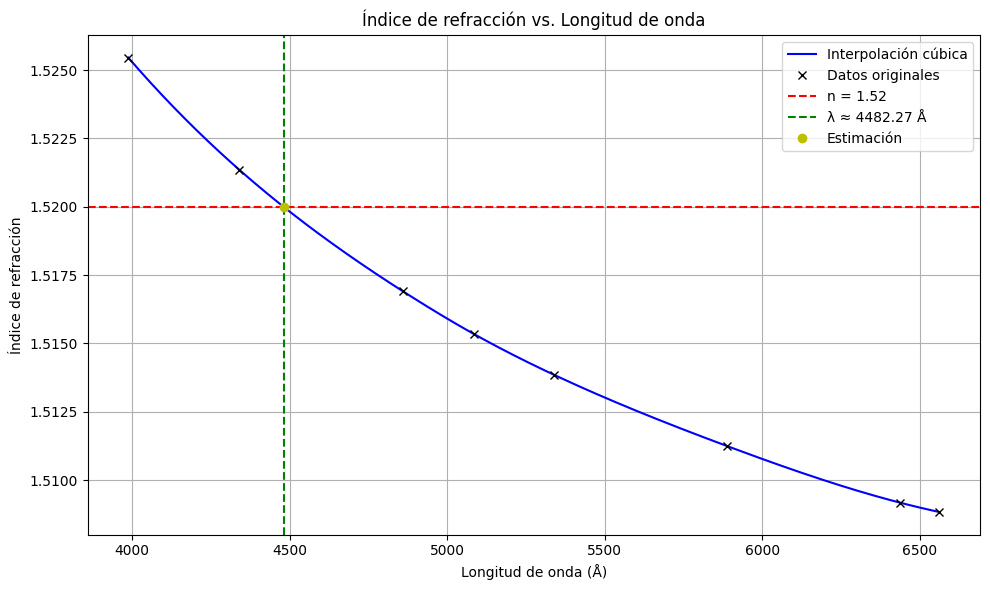

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Datos
lambda_angstrom = np.array([6563, 6439, 5890, 5338, 5086, 4861, 4340, 3988])
indice_refraccion = np.array([1.50883, 1.50917, 1.51124, 1.51386, 1.51534, 1.51690, 1.52136, 1.52546])

# Interpolación cúbica
interp = interp1d(indice_refraccion[::-1], lambda_angstrom[::-1], kind='cubic')

# Estimación
n_objetivo = 1.520
lambda_estimado = interp(n_objetivo)

# Crear una nueva interpolación para graficar (n vs lambda)
interp_plot = interp1d(lambda_angstrom[::-1], indice_refraccion[::-1], kind='cubic')
lambda_fina = np.linspace(min(lambda_angstrom), max(lambda_angstrom), 500)
n_interp = interp_plot(lambda_fina)

# Gráfica
plt.figure(figsize=(10,6))
plt.plot(lambda_fina, n_interp, label='Interpolación cúbica', color='blue')
plt.plot(lambda_angstrom, indice_refraccion, 'kx', label='Datos originales')
plt.axhline(y=n_objetivo, color='red', linestyle='--', label='n = 1.52')
plt.axvline(x=lambda_estimado, color='green', linestyle='--', label=f'λ ≈ {lambda_estimado:.2f} Å')
plt.plot(lambda_estimado, n_objetivo, 'yo', label='Estimación')

plt.xlabel('Longitud de onda (Å)')
plt.ylabel('Índice de refracción')
plt.title('Índice de refracción vs. Longitud de onda')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Conclusión:**

Mediante interpolación cúbica de los datos experimentales de índice de refracción en función de la longitud de onda, se determinó que una longitud de onda de aproximadamente 4482 Å corresponde a un índice de refracción de 1.520. Esta estimación es útil para el diseño de sistemas ópticos donde se requiere una precisión específica del índice de refracción para una longitud de onda dada, como en lentes, filtros o sistemas de corrección cromática. Además, la longitud de onda estimada $(≈448 nm)$ corresponde a luz en el rango azul-violeta, lo cual coincide con el comportamiento físico típico del vidrio, que presenta mayores índices de refracción para longitudes de onda más cortas,este comportamiento es esperado por la dispersión normal en materiales ópticos.